In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os, sys
from collections import defaultdict
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, plot_roc_curve,plot_confusion_matrix
import matplotlib
from matplotlib import pyplot as plt
import scipy

In [100]:
!git clone https://github.com/avidutta20/challenge_may21

fatal: destination path 'challenge_may21' already exists and is not an empty directory.


In [101]:
os.chdir('/content/challenge_may21/')

In [102]:
def load_data():
    pass
df = pd.read_csv('dataset/av_jobathon_may21_train.csv')

# creating a list of all trainable features name
feature_list = df.columns[1:10]
target = df.columns[10]  # 'Is_Lead' column name

# splitting into train & test
x_train, x_test, y_train, y_test = train_test_split(df[feature_list], df[target], test_size=0.25, random_state=25)


In [56]:
def checking_dataset_balance(df,feature_name, target):
  
  class_labels = df[target].unique()
  total_rows = df[target].count()
  class_dict={}
  for label in class_labels:
    class_dict[label] = {'value': df[target].loc[df[target]==label].count()}
    class_dict[label]['perc'] = (df[target].loc[df[target]==label].count())/total_rows
  return class_dict


In [103]:
checking_dataset_balance(df,feature_list,target)

{0: {'perc': 0.7627917387323228, 'value': 187437},
 1: {'perc': 0.23720826126767727, 'value': 58288}}

In [104]:
x_train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
188708,Male,44,RG268,Self_Employed,X3,87,No,543460,No
17007,Female,50,RG252,Self_Employed,X2,69,No,891895,Yes
109929,Male,77,RG284,Other,X3,81,No,1163416,No
81455,Male,74,RG283,Other,X1,14,No,1720031,No
77866,Female,25,RG283,Other,X1,21,No,1489690,Yes
...,...,...,...,...,...,...,...,...,...
130365,Female,68,RG254,Other,X3,93,No,2039817,Yes
92303,Female,34,RG284,Salaried,X1,20,No,873268,Yes
6618,Male,28,RG253,Other,X1,26,No,1186040,Yes
90430,Female,50,RG284,Salaried,X2,55,NaN,1649000,Yes


In [105]:
def execute_process(dframe, colname,func,arg1):
    dframe[colname] = dframe[colname].apply(lambda x: func(x,arg1))
    return dframe
def extract_process(value,index):
    value = int(value[index:])
    return value

def replace_values(value, value_dic):
    # replaces any value in the dframe colname with given dict
    return value_dic[value]

def default_value():
    return 0

In [139]:
# checking skewness
scipy.stats.skew(x_train['Avg_Account_Balance_std'])

2.975740857052575

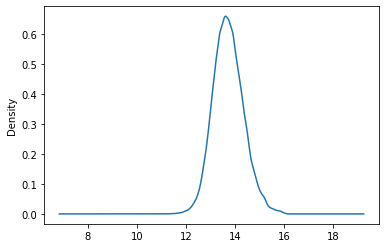

In [144]:
#log_transforming
def log_transform(x):
  result = 0.0
  if x!=0:
    result = np.log(x)
  else:
    result = np.log(0.00001)
  return result

x_train['Avg_Account_Balance_log'] = x_train['Avg_Account_Balance'].apply(lambda x: log_transform(x))
x_train['Avg_Account_Balance_log'].plot.kde()

In [145]:
scipy.stats.skew(x_train['Avg_Account_Balance_log'])

0.23654555482098255

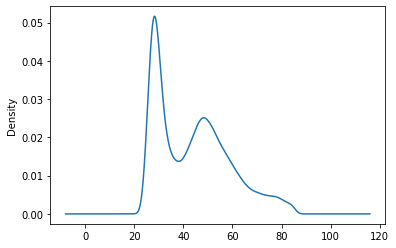

In [146]:
# Age
x_train['Age'].plot.kde()

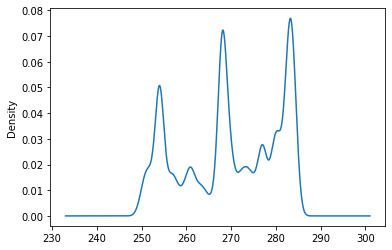

In [151]:
x_train['Region_Code'].plot.kde()

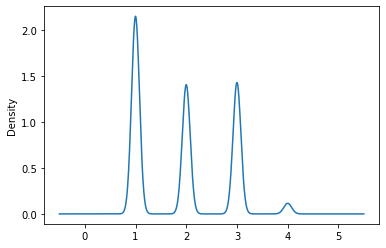

In [152]:
x_train['Channel_Code'].plot.kde()

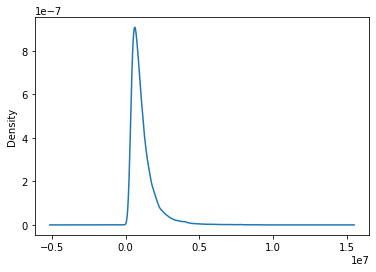

In [132]:
x_train['Avg_Account_Balance'].plot.kde()

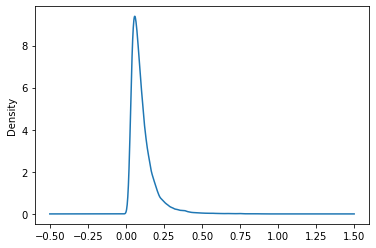

In [134]:
x_train['Avg_Account_Balance_Norm'].plot.kde()

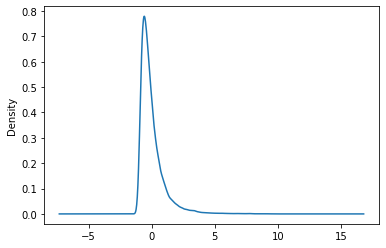

In [131]:
x_train['Avg_Account_Balance_std'].plot.kde()

(array([1.4100e+02, 1.5170e+03, 5.4650e+03, 1.1525e+04, 1.6020e+04,
        1.7707e+04, 1.7142e+04, 1.5881e+04, 1.3875e+04, 1.1983e+04,
        1.0511e+04, 8.6650e+03, 7.4540e+03, 6.3250e+03, 5.3200e+03,
        4.6770e+03, 3.7520e+03, 3.3490e+03, 2.9040e+03, 2.4720e+03,
        2.0300e+03, 1.7570e+03, 1.3600e+03, 1.3150e+03, 1.1370e+03,
        1.0430e+03, 8.5200e+02, 8.1000e+02, 6.7600e+02, 5.9000e+02,
        5.5100e+02, 4.4900e+02, 4.0700e+02, 4.1500e+02, 3.4600e+02,
        3.0600e+02, 3.1200e+02, 2.8500e+02, 3.2600e+02, 2.3600e+02,
        1.9100e+02, 1.8200e+02, 1.5000e+02, 1.1700e+02, 1.2000e+02,
        1.0100e+02, 9.3000e+01, 8.1000e+01, 7.6000e+01, 8.1000e+01,
        7.0000e+01, 7.0000e+01, 5.5000e+01, 6.4000e+01, 5.2000e+01,
        5.7000e+01, 7.1000e+01, 4.0000e+01, 4.1000e+01, 5.3000e+01,
        4.0000e+01, 3.0000e+01, 3.6000e+01, 4.0000e+01, 2.4000e+01,
        2.9000e+01, 2.7000e+01, 3.9000e+01, 2.4000e+01, 2.1000e+01,
        3.3000e+01, 2.7000e+01, 1.5000e+01, 3.70

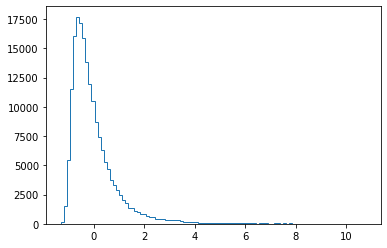

In [125]:
plt.hist(x_train['Avg_Account_Balance_std'],bins=100,histtype='step')

In [109]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [121]:
normalize = MinMaxScaler()
array = np.asanyarray(x_train['Avg_Account_Balance'])
array = array.reshape(-1,1)
array_norm = normalize.fit_transform(array)
std_scaler = StandardScaler()
array_std = std_scaler.fit_transform(array)

array_norm

array([[0.05059132],
       [0.08431774],
       [0.11059934],
       ...,
       [0.11278921],
       [0.15760096],
       [0.12473262]])

In [122]:
x_train['Avg_Account_Balance_Norm'] = array_norm
x_train['Avg_Account_Balance_std'] = array_std

In [123]:
x_train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Avg_Account_Balance_Norm,Avg_Account_Balance_std
188708,Male,44,RG268,Self_Employed,X3,87,No,543460,No,0.050591,-0.685483
17007,Female,50,RG252,Self_Employed,X2,69,No,891895,Yes,0.084318,-0.278806
109929,Male,77,RG284,Other,X3,81,No,1163416,No,0.110599,0.038101
81455,Male,74,RG283,Other,X1,14,No,1720031,No,0.164476,0.687756
77866,Female,25,RG283,Other,X1,21,No,1489690,Yes,0.142181,0.418913
...,...,...,...,...,...,...,...,...,...,...,...
130365,Female,68,RG254,Other,X3,93,No,2039817,Yes,0.195430,1.060995
92303,Female,34,RG284,Salaried,X1,20,No,873268,Yes,0.082515,-0.300546
6618,Male,28,RG253,Other,X1,26,No,1186040,Yes,0.112789,0.064507
90430,Female,50,RG284,Salaried,X2,55,NaN,1649000,Yes,0.157601,0.604852


In [60]:
gender_dic = is_active_dic = occupation_dic = defaultdict(default_value)
#%%
gender_dic = {'Male': 0,
                'Female': 1}
is_active_dic = {'Yes': 1,
                 'No': 0}

occupation_dic = {'Self_Employed': 1,
                     'Other': 2,
                     'Salaried': 3,
                     'Entrepreneur': 4}

In [61]:
def process(dframe, default_func = default_value):

  gender_dic = is_active_dic = occupation_dic = defaultdict(default_value)
  
  gender_dic = {'Male': 0,
                  'Female': 1}
  is_active_dic = {'Yes': 1,
                  'No': 0}

  occupation_dic = {'Self_Employed': 1,
                      'Other': 2,
                      'Salaried': 3,
                      'Entrepreneur': 4}

  execute_process(dframe,'Region_Code', extract_process, 2)
  print('Region Code Processed Successfully')

  execute_process(dframe,'Channel_Code', extract_process, 1)
  print('Channel Code Processed Successfully')

  execute_process(dframe,'Gender', replace_values, gender_dic)
  print('Gender Processed Successfully')

  execute_process(dframe,'Occupation', replace_values, occupation_dic)
  print('Occupation Processed Successfully')

  execute_process(dframe,'Is_Active',replace_values, is_active_dic)
  print('Is Active Processed Successfully')

  dframe['Credit_Product'] = dframe['Credit_Product'].fillna('No')
  execute_process(dframe,'Credit_Product',replace_values, is_active_dic)
  return dframe

In [149]:
# processing x_train
x_train = process(x_train)
print('X_Train processed successfully!')

Region Code Processed Successfully
Channel Code Processed Successfully
Gender Processed Successfully
Occupation Processed Successfully
Is Active Processed Successfully
X_Train processed successfully!


In [154]:
x_train.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Avg_Account_Balance_Norm', 'Avg_Account_Balance_std',
       'Avg_Account_Balance_log'],
      dtype='object')

In [150]:
x_train.columns

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Avg_Account_Balance_Norm,Avg_Account_Balance_std,Avg_Account_Balance_log
188708,0,44,268,1,3,87,0,543460,0,0.050591,-0.685483,13.205711
17007,1,50,252,1,2,69,0,891895,1,0.084318,-0.278806,13.701104
109929,0,77,284,2,3,81,0,1163416,0,0.110599,0.038101,13.966871
81455,0,74,283,2,1,14,0,1720031,0,0.164476,0.687756,14.357853
77866,1,25,283,2,1,21,0,1489690,1,0.142181,0.418913,14.214079
...,...,...,...,...,...,...,...,...,...,...,...,...
130365,1,68,254,2,3,93,0,2039817,1,0.195430,1.060995,14.528371
92303,1,34,284,3,1,20,0,873268,1,0.082515,-0.300546,13.679998
6618,0,28,253,2,1,26,0,1186040,1,0.112789,0.064507,13.986131
90430,1,50,284,3,2,55,0,1649000,1,0.157601,0.604852,14.315680


In [160]:
x_train = x_train[['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage','Credit_Product', 'Is_Active','Avg_Account_Balance_log']]

In [69]:
# processing df matrix
df_processed = process(df)

Region Code Processed Successfully
Channel Code Processed Successfully
Gender Processed Successfully
Occupation Processed Successfully
Is Active Processed Successfully


In [72]:
corr_mat_process = df_processed.corr(method = 'kendall')
corr_mat_process

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
Gender,1.000000,-0.137508,-0.004632,0.104199,-0.149257,-0.113707,-0.042976,-0.027412,-0.064207,-0.072068
Age,-0.137508,1.000000,0.088536,-0.308852,0.537316,0.477790,0.116510,0.121379,0.190050,0.210291
Region_Code,-0.004632,0.088536,1.000000,-0.059550,0.086861,0.078055,0.039581,0.074180,0.053643,0.052850
Occupation,0.104199,-0.308852,-0.059550,1.000000,-0.418543,-0.253667,-0.083320,-0.038388,-0.190832,-0.082285
Channel_Code,-0.149257,0.537316,0.086861,-0.418543,1.000000,0.424287,0.170236,0.107507,0.246361,0.257632
Vintage,-0.113707,0.477790,0.078055,-0.253667,0.424287,1.000000,0.062388,0.134562,0.150924,0.208096
Credit_Product,-0.042976,0.116510,0.039581,-0.083320,0.170236,0.062388,1.000000,0.054118,-0.110699,0.117709
Avg_Account_Balance,-0.027412,0.121379,0.074180,-0.038388,0.107507,0.134562,0.054118,1.000000,0.073453,0.063248
Is_Active,-0.064207,0.190050,0.053643,-0.190832,0.246361,0.150924,-0.110699,0.073453,1.000000,0.085723
Is_Lead,-0.072068,0.210291,0.052850,-0.082285,0.257632,0.208096,0.117709,0.063248,0.085723,1.000000


In [67]:
corr_mat = x_train.corr()
corr_mat

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
Gender,1.000000,-0.150568,-0.004179,0.110200,-0.148593,-0.145092,-0.041633,-0.022431,-0.062795
Age,-0.150568,1.000000,0.118792,-0.377244,0.605753,0.630092,0.130760,0.145765,0.217534
Region_Code,-0.004179,0.118792,1.000000,-0.070639,0.104061,0.119480,0.047845,0.076968,0.059558
Occupation,0.110200,-0.377244,-0.070639,1.000000,-0.450479,-0.324363,-0.083898,-0.030624,-0.202836
Channel_Code,-0.148593,0.605753,0.104061,-0.450479,1.000000,0.537357,0.178242,0.101156,0.249816
Vintage,-0.145092,0.630092,0.119480,-0.324363,0.537357,1.000000,0.096982,0.167685,0.207711
Credit_Product,-0.041633,0.130760,0.047845,-0.083898,0.178242,0.096982,1.000000,0.046917,-0.111769
Avg_Account_Balance,-0.022431,0.145765,0.076968,-0.030624,0.101156,0.167685,0.046917,1.000000,0.076829
Is_Active,-0.062795,0.217534,0.059558,-0.202836,0.249816,0.207711,-0.111769,0.076829,1.000000


In [68]:
type(corr_mat)

pandas.core.frame.DataFrame

In [161]:
# %% Implementing Random Forests

clf_rforest = RandomForestClassifier(random_state= 10, max_features="log2", oob_score= True)
clf_rforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)

In [164]:
x_train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active,Avg_Account_Balance_log
188708,0,44,268,1,3,87,0,0,13.205711
17007,1,50,252,1,2,69,0,1,13.701104
109929,0,77,284,2,3,81,0,0,13.966871
81455,0,74,283,2,1,14,0,0,14.357853
77866,1,25,283,2,1,21,0,1,14.214079
...,...,...,...,...,...,...,...,...,...
130365,1,68,254,2,3,93,0,1,14.528371
92303,1,34,284,3,1,20,0,1,13.679998
6618,0,28,253,2,1,26,0,1,13.986131
90430,1,50,284,3,2,55,0,1,14.315680


In [166]:
# %%
# getting important features
feature_list = x_train.columns
imp_feature = {}
for feat_name, weight in zip(feature_list, clf_rforest.feature_importances_):
    imp_feature[feat_name] = weight


for key in imp_feature:
    print(f'{key} : {round(imp_feature[key],5)*100}')

Gender : 2.007
Age : 19.209
Region_Code : 13.352
Occupation : 5.348
Channel_Code : 5.545
Vintage : 20.479
Credit_Product : 1.37
Is_Active : 1.657
Avg_Account_Balance_log : 31.034


In [173]:
# processing x_test
x_test = process(dframe= x_test)


Region Code Processed Successfully
Channel Code Processed Successfully
Gender Processed Successfully
Occupation Processed Successfully
Is Active Processed Successfully


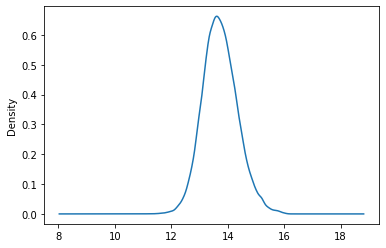

In [169]:
x_test['Avg_Account_Balance_log'] = x_test['Avg_Account_Balance'].apply(lambda x: log_transform(x))
x_test['Avg_Account_Balance_log'].plot.kde()

In [170]:
x_test.pop('Avg_Account_Balance')

171739    1237838
98848      678162
184607     343593
61725      960701
48107     2209273
           ...   
236899    1914950
65610     1052300
42881      387123
199081     630387
104851     336206
Name: Avg_Account_Balance, Length: 61432, dtype: int64

In [174]:
x_test

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active,Avg_Account_Balance_log
171739,1,30,274,2,1,33,0,0,14.028877
98848,0,29,256,3,1,14,0,1,13.427141
184607,1,29,270,3,1,20,1,0,12.747213
61725,0,28,268,3,1,15,0,1,13.775419
48107,0,57,268,3,2,50,0,0,14.608174
...,...,...,...,...,...,...,...,...,...
236899,0,65,283,2,3,91,0,1,14.465202
65610,1,28,250,3,1,13,1,0,13.866489
42881,1,27,266,3,1,19,0,0,12.866498
199081,0,43,276,1,2,68,0,1,13.354089


In [175]:
y_hat_rforest = clf_rforest.predict(x_test)
y_hat_rf_proba = clf_rforest.predict_proba(x_test)

In [13]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_hat_rforest)
print(accuracy)

0.7775589269436124


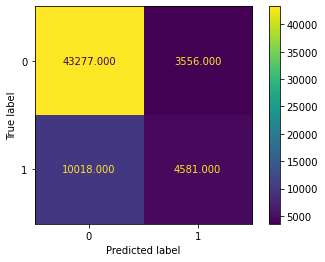

In [176]:
plot_confusion_matrix(estimator= clf_rforest,X=x_test, y_true=y_test, values_format= '.3f')

In [178]:
roc_auc_score(y_true=y_test, y_score=y_hat_rf_proba[:,1])

0.7564351520185456

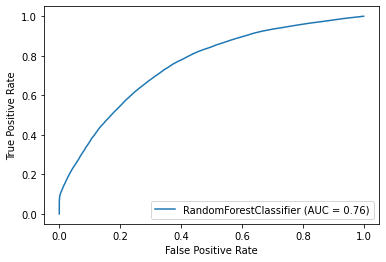

In [16]:
plot_roc_curve(clf_rforest, X=x_test, y=y_test)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:

# using logistic_regression
clf_logistic = LogisticRegression()
clf_logistic.fit(x_train, y_train)
y_hat_logistic = clf_logistic.predict(x_test)

In [80]:
import matplotlib
from matplotlib import pyplot as plt

In [78]:
def metrics(Pred, Classifier, X_Test=x_test, labels=y_test):
  # prints different metrics
  accuracy = accuracy_score(y_true=labels, y_pred=Pred)
  roc_auc = roc_auc_score(y_true=labels, y_score=Pred)
  print(f'Accuracy: {accuracy} \n ROC_AUC_Score: {roc_auc}')
  
  
  
  plot_confusion_matrix(estimator= Classifier,X=X_Test, y_true=labels, values_format= '.3f')

  
  plot_roc_curve(Classifier, X=X_Test, y=labels)

  return accuracy, roc_auc_score



Accuracy: 0.7775589269436124 
 ROC_AUC_Score: 0.6171801889192811


(0.7775589269436124, <function sklearn.metrics._ranking.roc_auc_score>)

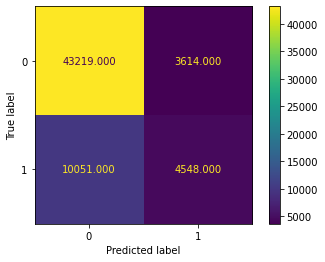

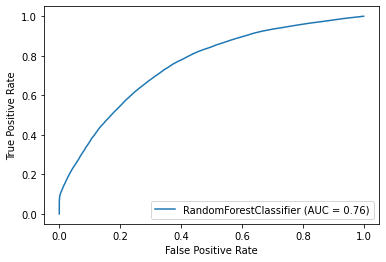

In [79]:
metrics(y_hat_rforest,clf_rforest)

Accuracy: 0.7177041281416852 
 ROC_AUC_Score: 0.6854151417165041


(0.7177041281416852, <function sklearn.metrics._ranking.roc_auc_score>)

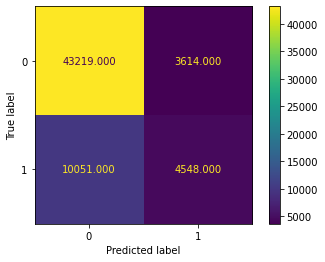

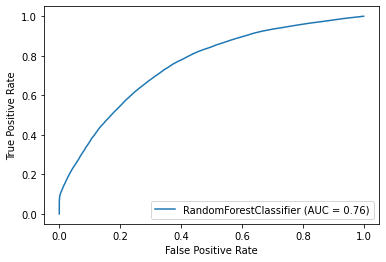

In [23]:
threshold = 0.3
predicted = (y_hat_rf_proba [:,1] >= threshold).astype('int')
metrics(predicted,clf_rforest)

In [24]:
from sklearn.svm import SVC

In [ ]:
clf_svc = SVC(kernel='poly',degree=3 ,random_state= 25)
clf_svc.fit(x_test, y_test)
y_hat_svc = clf_svc.predict(x_test)


Accuracy: 0.7623551243651517 
 ROC_AUC_Score: 0.5


(0.7623551243651517, <function sklearn.metrics._ranking.roc_auc_score>)

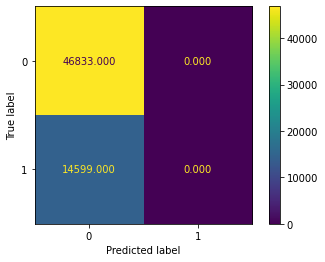

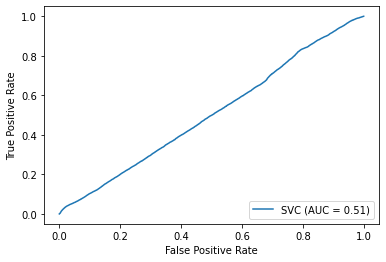

In [26]:
metrics(y_hat_svc,clf_svc)

In [ ]:

label_name = [1,0]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf_rforest.estimators_[0],
               feature_names = feature_list, 
               class_names=label_name,
               filled = True);

fig.savefig('rf_individualtree.png')